<div style="background-color:red; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
  Customer Segmentation Using Clustering

</div>


<div style="background-color:Green; color:white; text-align:center; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
 Importing

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

<div style="background-color:Green; color:white; text-align:center; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
 Loading Data

</div>

In [2]:
data = pd.read_csv("Dataset.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.shape

(8950, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<div style="background-color:#CCFFCC; color:green; text-align:left; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
 Now we will count null values in each column and if we find 80% is null we will drop this col on other side we will impute it by mean value

</div>

In [6]:
def view_null_count_features(train_data):
    
    null_count_df = pd.DataFrame(train_data.isna().sum()).rename(columns={0:'count'})
    null_count_df = null_count_df[null_count_df['count'] > 0].sort_values(by= 'count',ascending=False)
    display(null_count_df)
    
    check_80_percent = .8 * train_data.shape[0]
    
    f_to_be_removed = []
    f_to_be_filled = []
    
    
    for col in null_count_df.index :
        if null_count_df.loc[col][0] >= check_80_percent :
            f_to_be_removed.append(col)
        elif null_count_df.loc[col][0] < check_80_percent :
            f_to_be_filled.append(col)
        
    
    print("#>>>f_to_be_removed:", f_to_be_removed)
    print("#>>>f_to_be_filled:", f_to_be_filled)
    return f_to_be_removed , f_to_be_filled 

In [7]:
f_to_be_removed , f_to_be_filled  = view_null_count_features(data)

,count
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1


#>>>f_to_be_removed: []
#>>>f_to_be_filled: ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']


In [8]:
for col in f_to_be_filled :
        data[col].fillna(data[col].mean() , inplace= True)

In [9]:
data.isna().sum().sum()

0

<div style="background-color:#CCFFCC; color:green; text-align:left; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
we will search columns which has more 80% repeated values to drop it because it can give varience or difference between observations 

</div>

In [10]:
def drop_redundant_coulmns(train_data):
    check_value = (80/100) * train_data.shape[0]
    droped_cols_dict = {}
    for col in train_data.columns:
        ma_x = train_data[col].value_counts().max()
        if ma_x >= check_value :
            droped_cols_dict[col] = ma_x
    return droped_cols_dict       
    
    
droped_cols_dict = drop_redundant_coulmns(data)
droped_cols_dict # show column and his max value redundant

{'TENURE': 7584}

In [11]:
data['TENURE'].value_counts()

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

In [12]:
data.drop(columns= ['TENURE','CUST_ID'],inplace=True)


<div style="background-color:#CCFFCC; color:green; text-align:left; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
Time to know which columns has same information and detect linear relation between them to drop one from two highly correlated columns using correlation matrix

</div>

In [13]:
corr_matrix = data.corr()
corr_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773


In [14]:
def drop_correlated_columns(corr_matrix):
    droped_cols = []
    for row in range(corr_matrix.shape[1]):
        for column in range(row+1 , corr_matrix.shape[1] ):
            if np.abs(corr_matrix.values[row , column]) >= .7 :
                    droped_cols.append(corr_matrix.columns[column])
                    
    return droped_cols                    
         
    

corr_droped_cols = list(set(drop_correlated_columns(corr_matrix))) # set then list to remove repeated cols
print(f'the columns are droped are  {corr_droped_cols}')


the columns are droped are  ['CASH_ADVANCE_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES']


In [15]:
data.drop(columns=corr_droped_cols,inplace=True)

##### Just put data columns in variable called cols

In [16]:
cols = data.columns
len(cols)

13

<div style="background-color:#CCFFCC; color:green; text-align:left; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
Here I scale all data with Standard Scaler Because it is important with PCA and scaling is imporant to make computation is easy for CPU especially when draw dendrogram

</div>

In [17]:
scaler = StandardScaler()
data[cols] = scaler.fit_transform(data[cols])

In [18]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,-0.591796,0.688639,0.818642,8.931021e-02,0.234227
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551


<div style="background-color:#CCFFCC; color:green; text-align:left; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
Here Data Visualization to plot the distribution for each column 

</div>

## Distribution plot (Kdeplot)

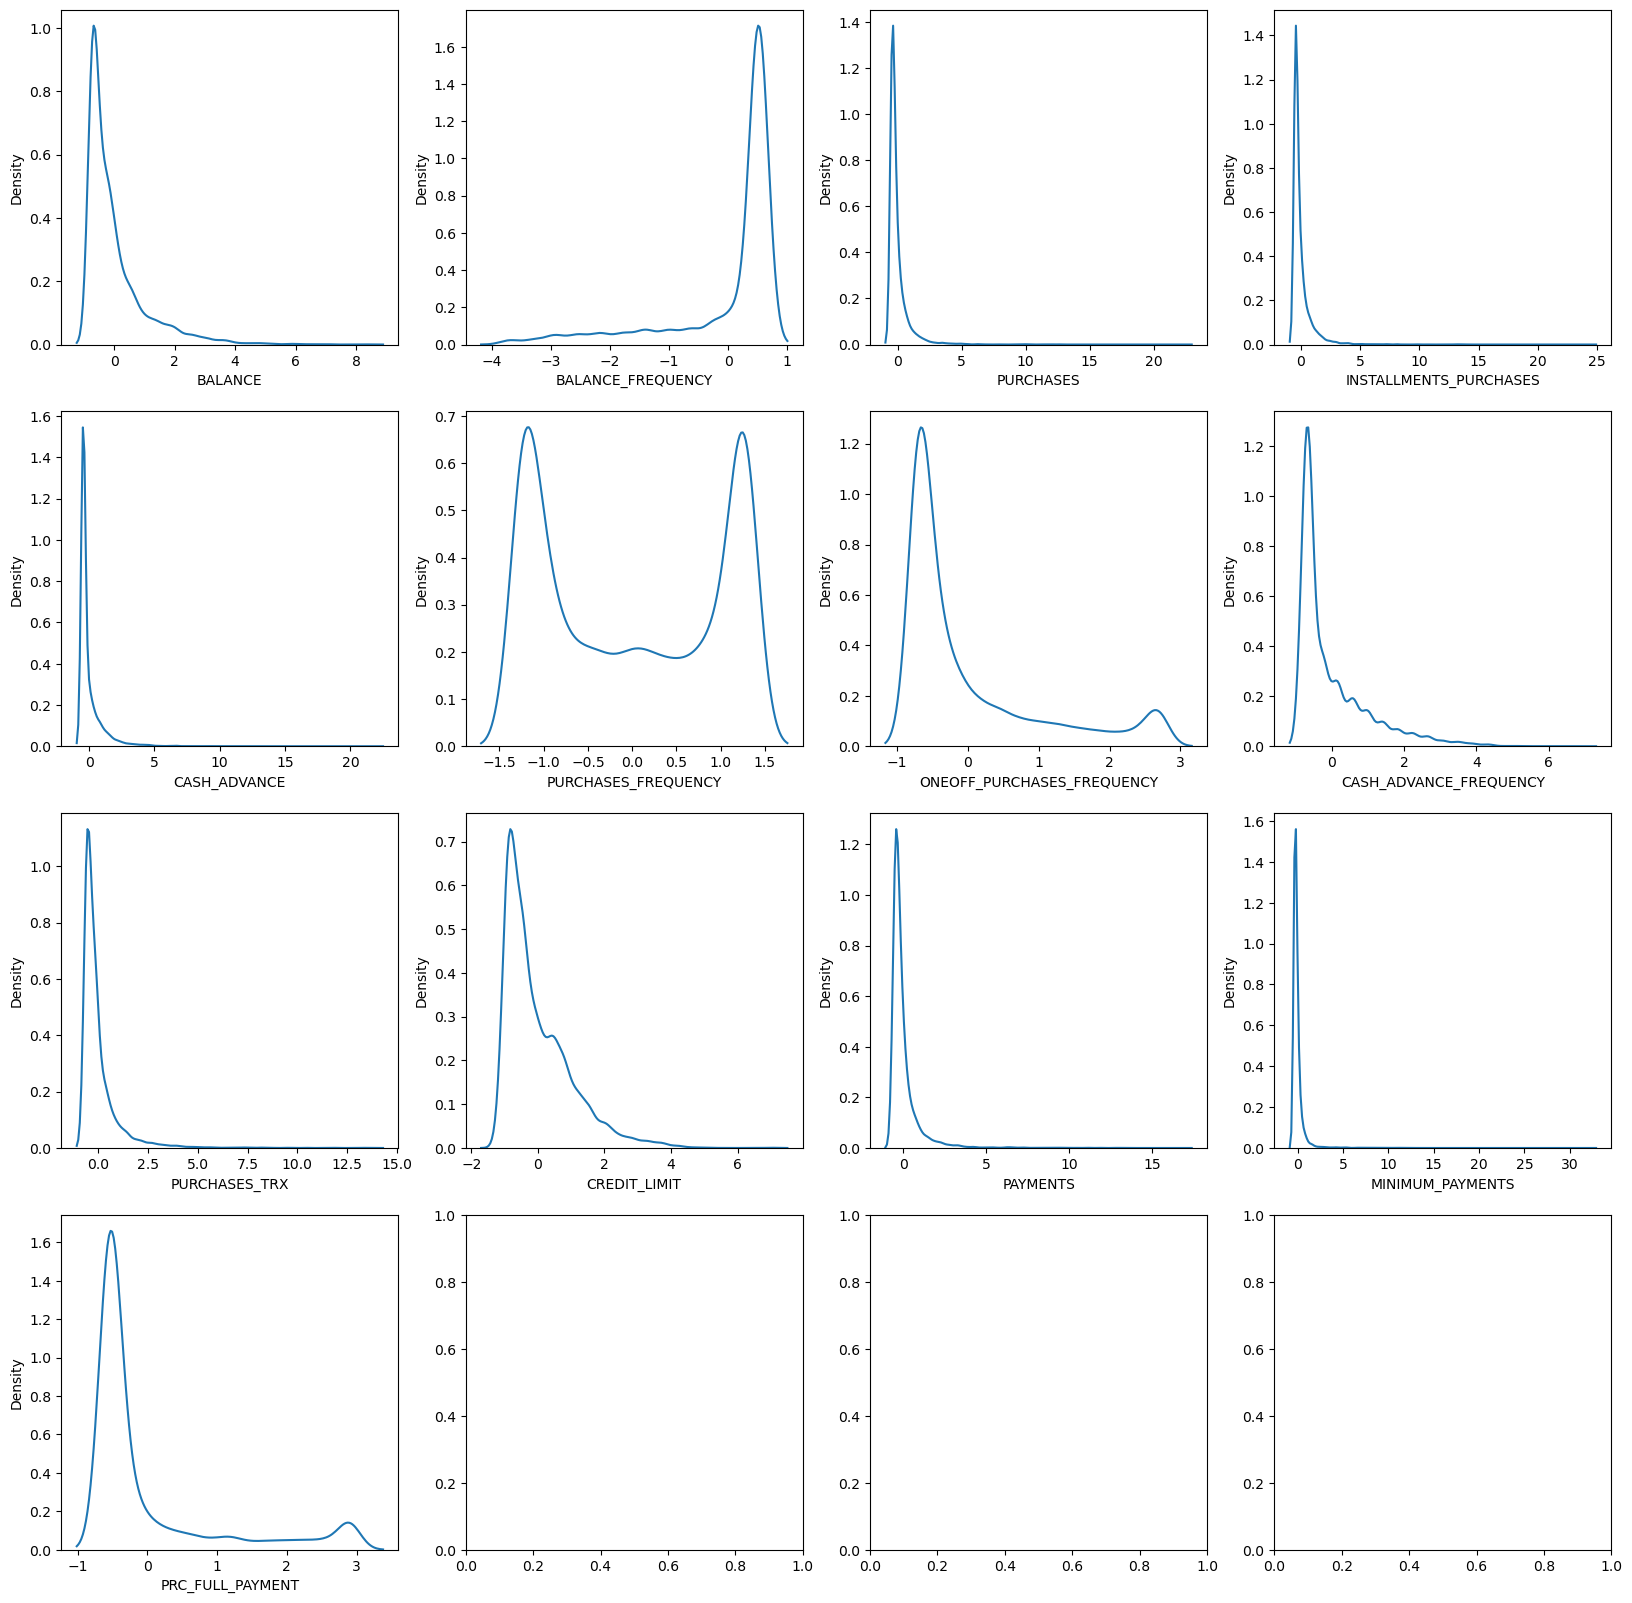

In [19]:
ncols = 4
nrows=4
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 20))
ax = ax.flatten()
i=0
for col in cols:
    sns.kdeplot(data=data, x=col,ax=ax[i])
    i+=1


plt.show()

### Histogram

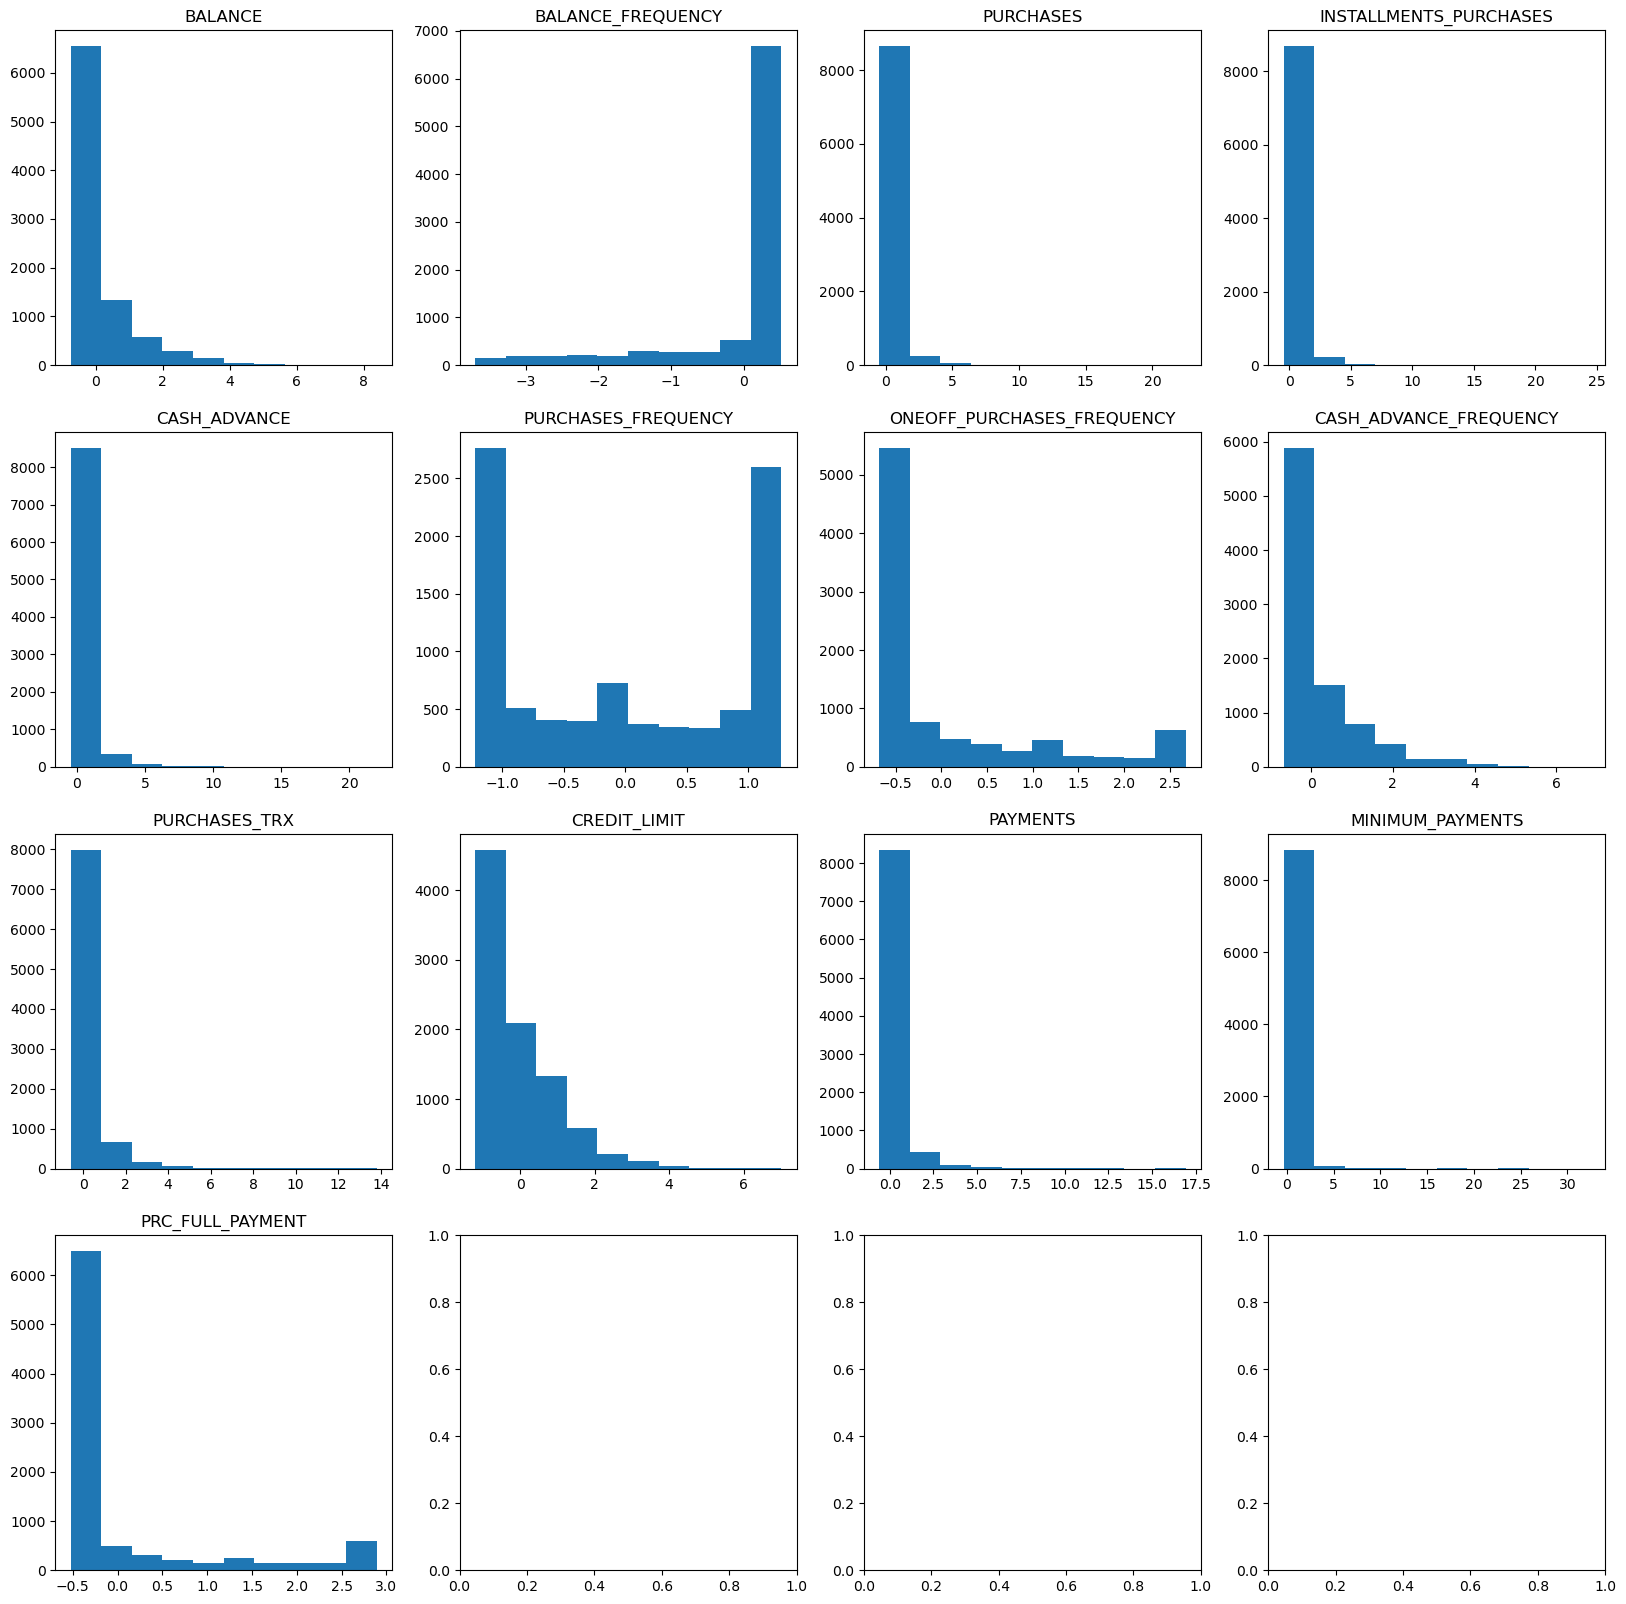

In [20]:
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 20))
ax = ax.flatten()
i=0
for col in cols:
    ax[i].hist(data[col])
    ax[i].set_title(col)
    i+=1


plt.show()

### Boxplot

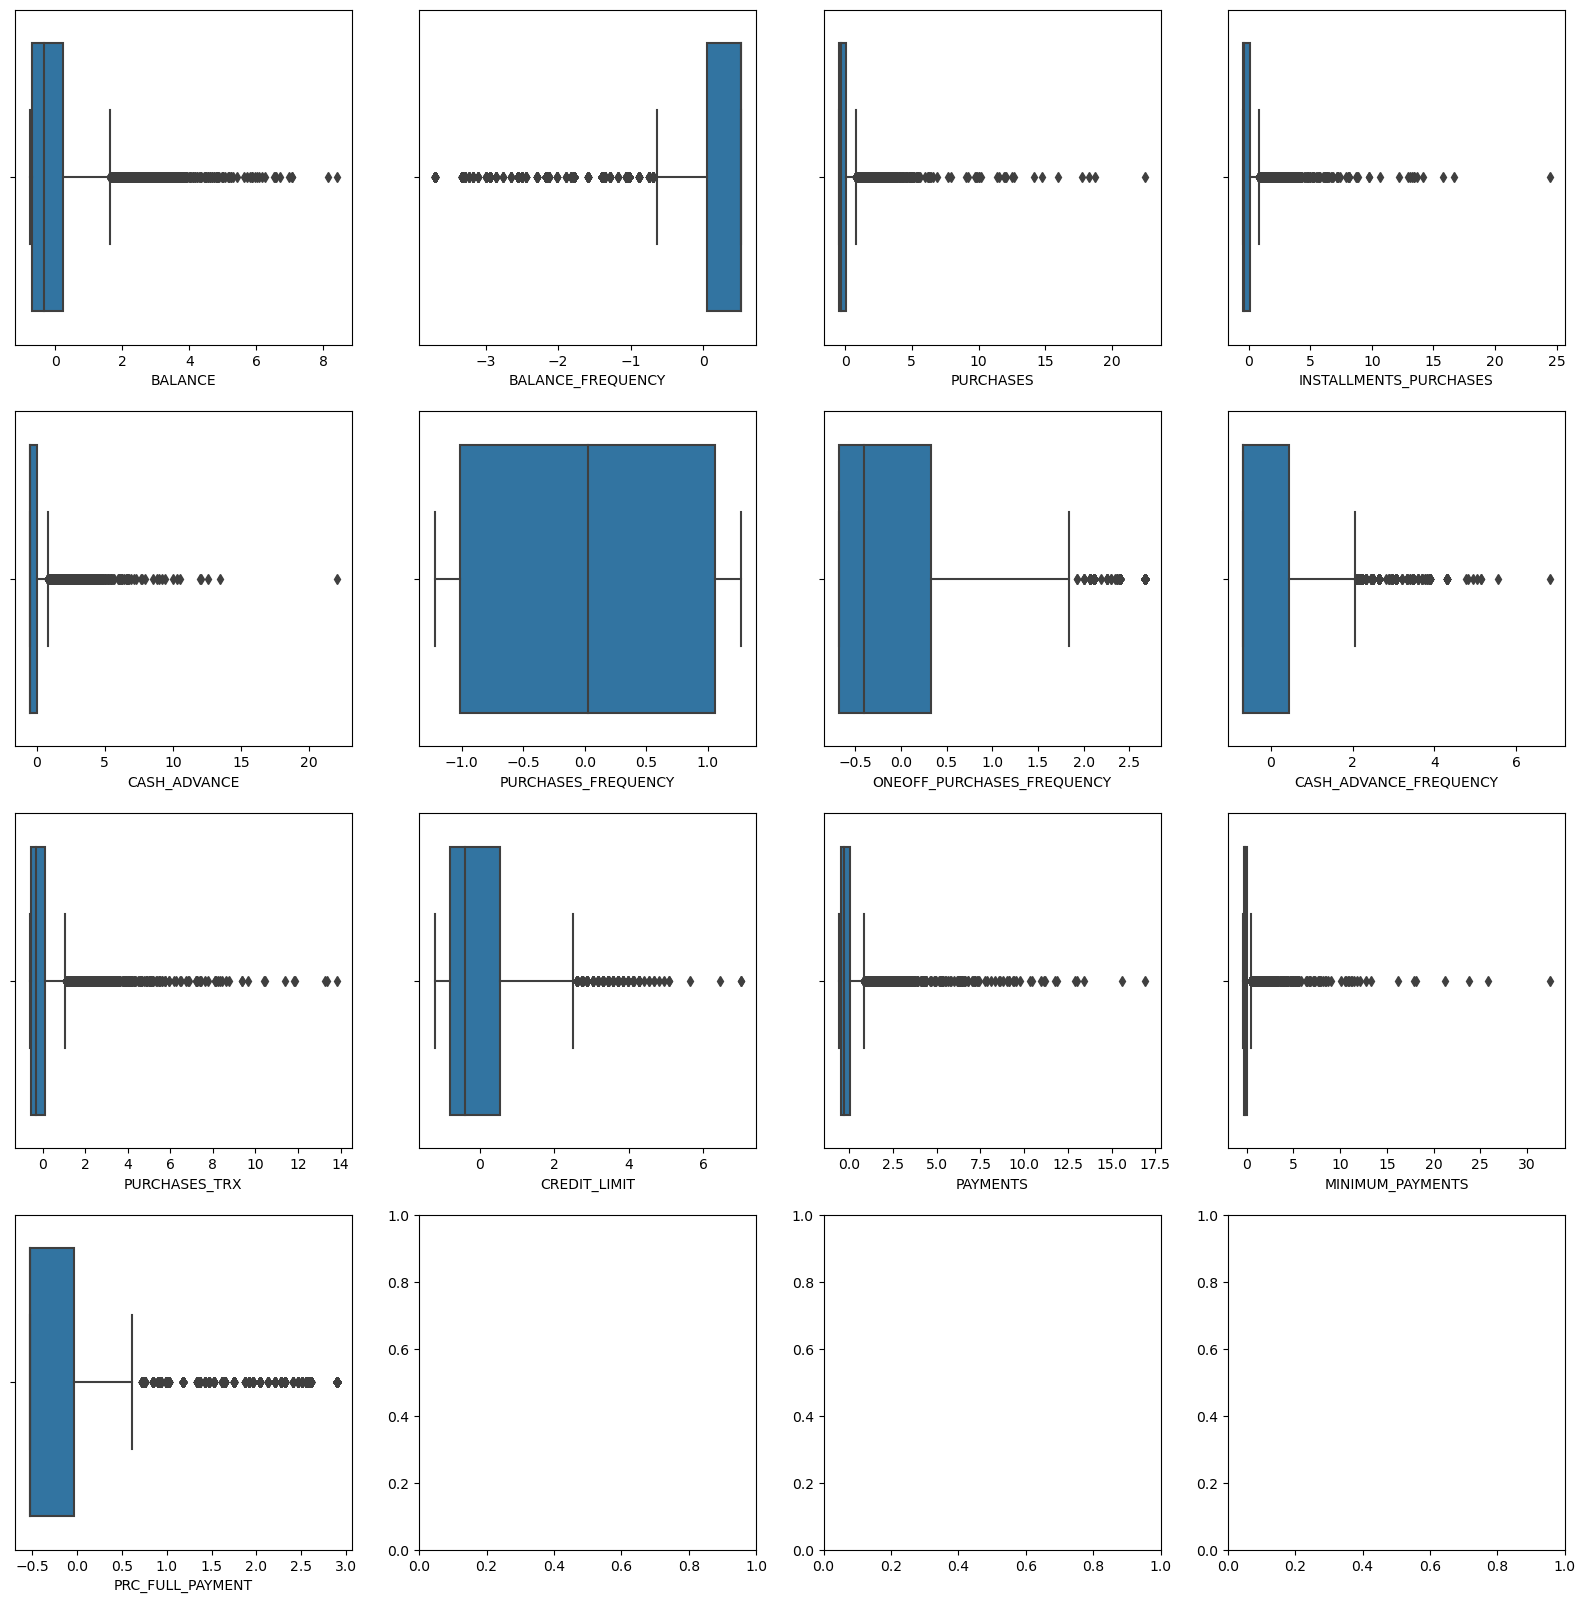

In [21]:
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 20))
ax = ax.flatten()
i=0
for col in cols:
    sns.boxplot(x=data[col] , ax=ax[i])
    i+=1


plt.show()

<div style="background-color:green; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
 Dimensionality reduction Via Component Analysis (PCA) 

</div>


### we will try 2D and 3D

<div style="background-color:green; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
2D

</div>


In [22]:
pca2 = PCA(n_components=2)
pca2.fit(data)
pca_df2 = pd.DataFrame(pca2.transform(data), columns=(["col1","col2"]))
pca_df2.head()

,col1,col2
0,-1.737571,-0.723576
1,-0.436058,2.731578
2,1.199155,-0.640445
3,-0.940750,0.222284
4,-1.519779,-0.355699


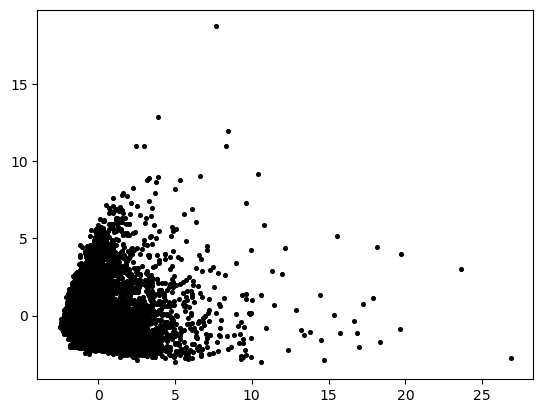

In [23]:
f1 = pca_df2['col1']
f2 = pca_df2['col2']
plt.scatter(f1, f2, c='black', s=7)

<div style="background-color:green; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
 3D

</div>


In [24]:
pca3 = PCA(n_components=3)
pca3.fit(data)
pca_df3 = pd.DataFrame(pca3.transform(data), columns=(["col1","col2","col3"]))
pca_df3.head()

,col1,col2,col3
0,-1.737571,-0.723576,0.093691
1,-0.436058,2.731579,-1.332925
2,1.199155,-0.640446,1.389119
3,-0.940750,0.222285,-0.510207
4,-1.519779,-0.355699,0.543696


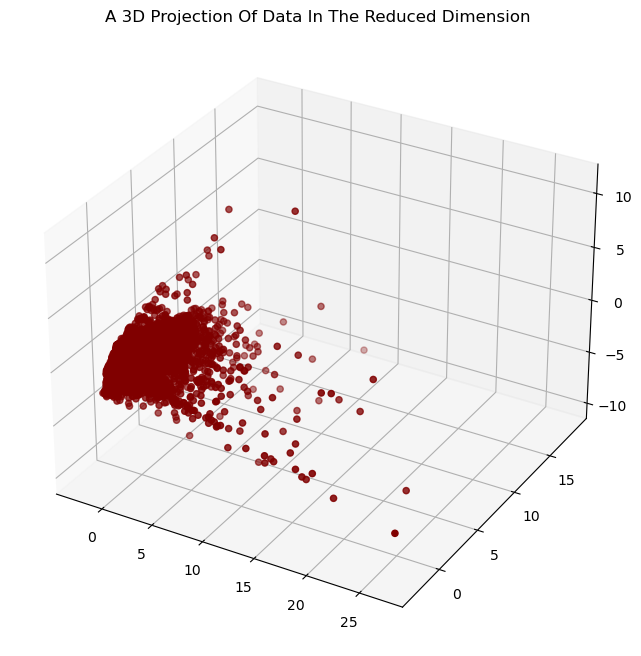

In [25]:
#A 3D Projection Of Data In The Reduced Dimension
x =pca_df3["col1"]
y =pca_df3["col2"]
z =pca_df3["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<div style="background-color:green; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
 using The Elbow Method with K-means showing the optimal k
</div>


In [26]:
inertias = []
# Looping over different number of clusters
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k , n_init='auto')
    kmeans.fit(pca_df2)
    inertias.append(kmeans.inertia_)

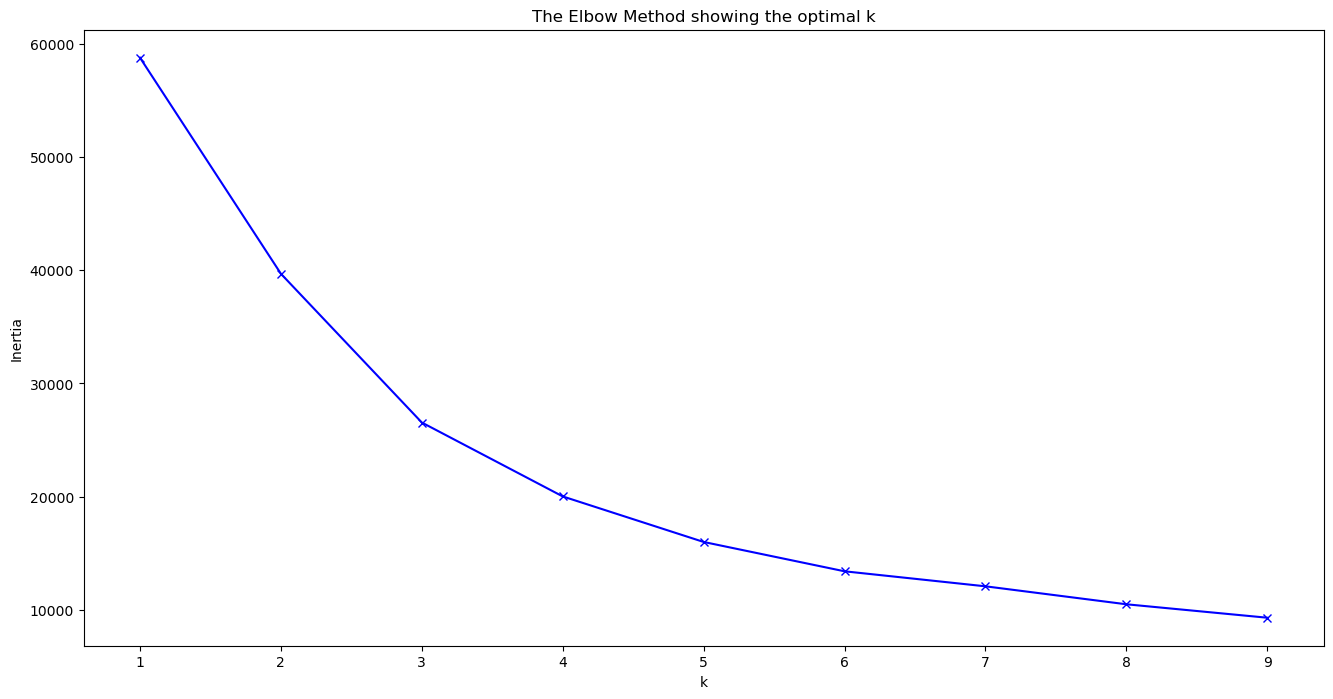

In [27]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K=5 looklike is best one

<div style="background-color:green; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
We will using Three Algorithms for clustering the 2d data from PCA <br>   
</div>
- KMeans<br>
- DBSCAN<br>
- AgglomerativeClustering (hierarchical clustering)

<div style="background-color:green; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
KMeans with k = 5
</div>


Text(0, 0.5, 'Feature 2')

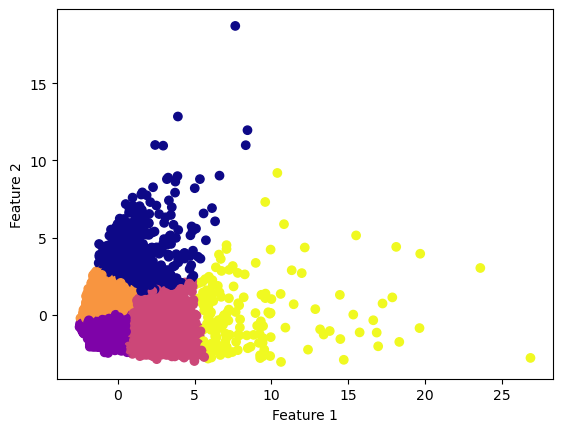

In [28]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5,n_init='auto')
kmeans.fit(pca_df2)
y_pred = kmeans.predict(pca_df2)
# plot the cluster assignments
f1 = pca_df2['col1']
f2 = pca_df2['col2']
plt.scatter(f1, f2, c=y_pred, cmap="plasma")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [29]:
print('KMeans silhouette score : ', silhouette_score(pca_df2 , y_pred) )

KMeans silhouette score :  0.3761307660619565


<div style="background-color:green; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
DBSCAN
</div>


Text(0, 0.5, 'Feature 2')

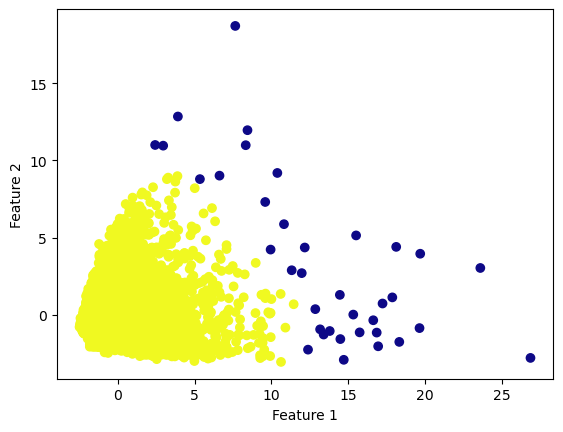

In [30]:
dbscan = DBSCAN(eps=1.46, min_samples = 6)
clusters = dbscan.fit_predict(pca_df2)
# plot the cluster assignments
plt.scatter(f1, f2, c=clusters, cmap="plasma")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [31]:
print('DBSCAN silhouette score : ', silhouette_score(pca_df2 , clusters) )

DBSCAN silhouette score :  0.8103105348612131


## It work very good to cluster it to two clusters one cluster and another is noise  

<div style="background-color:green; color:white; text-align:center; padding:20px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
AgglomerativeClustering
</div>


<div style="background-color:#CCFFCC; color:green; text-align:left; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
first we will draw dendrogram to can choose best k 

</div>

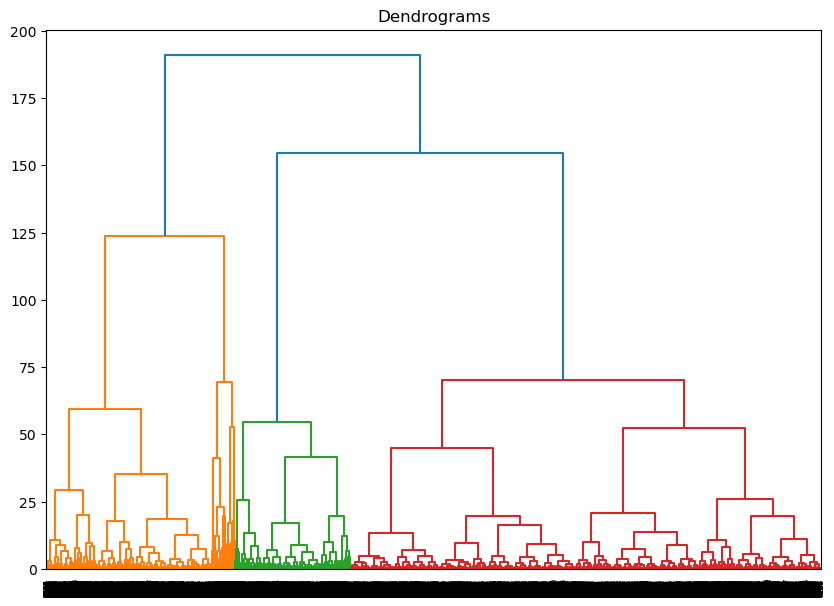

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_df2, method='ward'))

<div style="background-color:#CCFFCC; color:green; text-align:left; padding:5px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
best k is 3 or 4 so let do both and decide after that

</div>

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


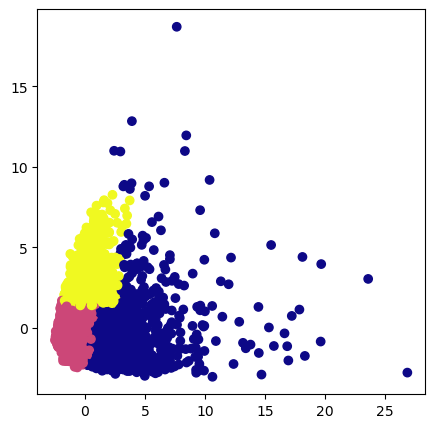

In [33]:
# K = 3
cluster1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean')  
cl1 = cluster1.fit_predict(pca_df2)
plt.figure(figsize=(5, 5))  
plt.scatter(f1, f2, c=cluster1.labels_,cmap="plasma") 

In [34]:
print('3K_AgglomerativeClustering silhouette score : ', silhouette_score(pca_df2 , cl1) )

3K_AgglomerativeClustering silhouette score :  0.42233765359606923


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


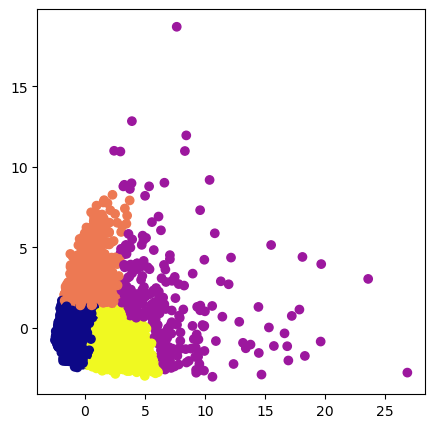

In [35]:
# K = 4
cluster2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean')  
cl2 = cluster2.fit_predict(pca_df2)
plt.figure(figsize=(5, 5))  
plt.scatter(f1, f2, c=cluster2.labels_,cmap="plasma") 

In [36]:
print('4K_AgglomerativeClustering silhouette score : ', silhouette_score(pca_df2 , cl2) )

4K_AgglomerativeClustering silhouette score :  0.4229746707567455


<div style="background-color:black; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
  Finally We find DBSCAN is the Best option with 2D projection from PCA with <br>
  <b>score 81%
</div>

### we can do PCA at any another Dimension but I choose 2D So I can Visualize My Work

<div style="background-color:green; color:white; text-align:center; padding:10px; border-radius:10px; font-size:20px; font-family:Georgia, serif;">
  END
</div>
